# Heart Disease Diagnostic Analysis Using Machine Learning Algorithms

#### According to statistics from WHO, it has been estimated that 24% of deaths due to non-communicable diseases in india are caused by heart disease.


#### In this notebook, i will try to unleash useful insights using this heart disease datasets and by building model by combining the power of best performing machine learning algorithms.

### Import the Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

### Read Dataset and Preprocess the Data

In [11]:
heartdata=pd.read_csv(r"C:\Users\Kajal Zadpide\Documents\Heart Disease Data.csv")
heartdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
heartdata.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Total missing percent of data

In [14]:
missing_data = heartdata.isnull().sum()
total_percentage = (missing_data.sum()/heartdata.shape[0])*100
print(f'Total percentage of missing data is {round(total_percentage,2)}%')
duplicate=heartdata[heartdata.duplicated()]
print("Duplicate rows:")
duplicate
#drop duplicate rows
heartdata=heartdata.drop_duplicates()


Total percentage of missing data is 0.0%
Duplicate rows:


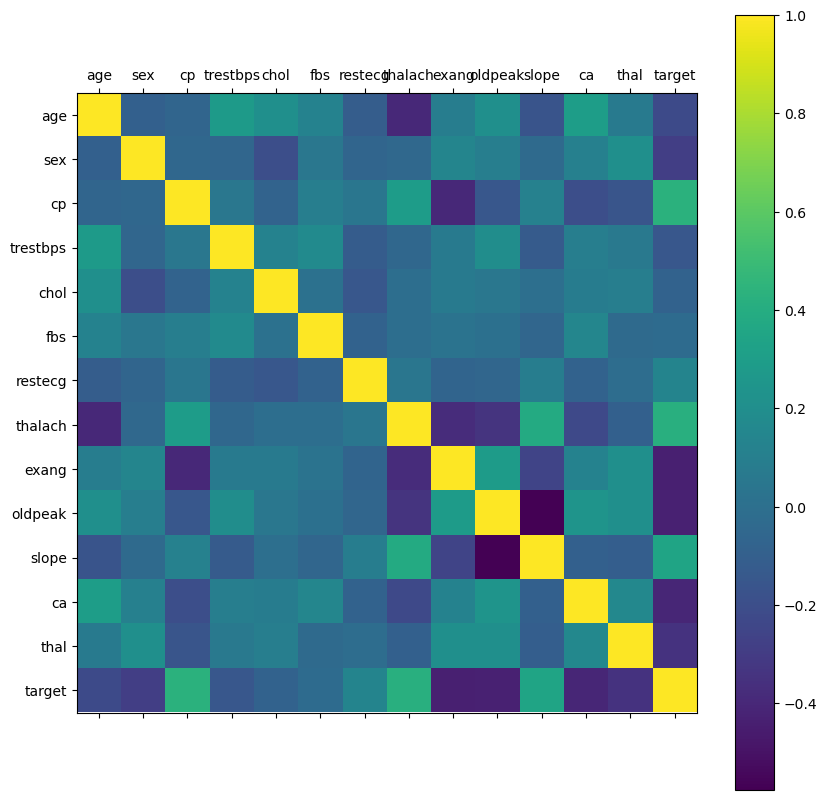

In [15]:
rcParams['figure.figsize'] = 10,10
plt.matshow(heartdata.corr())
plt.yticks(np.arange(heartdata.shape[1]), heartdata.columns)
plt.xticks(np.arange(heartdata.shape[1]), heartdata.columns)
plt.colorbar()
plt.show()

In [16]:
corr = heartdata.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


### Distribution of heart disease among Males and Females

In [34]:
heartdata.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

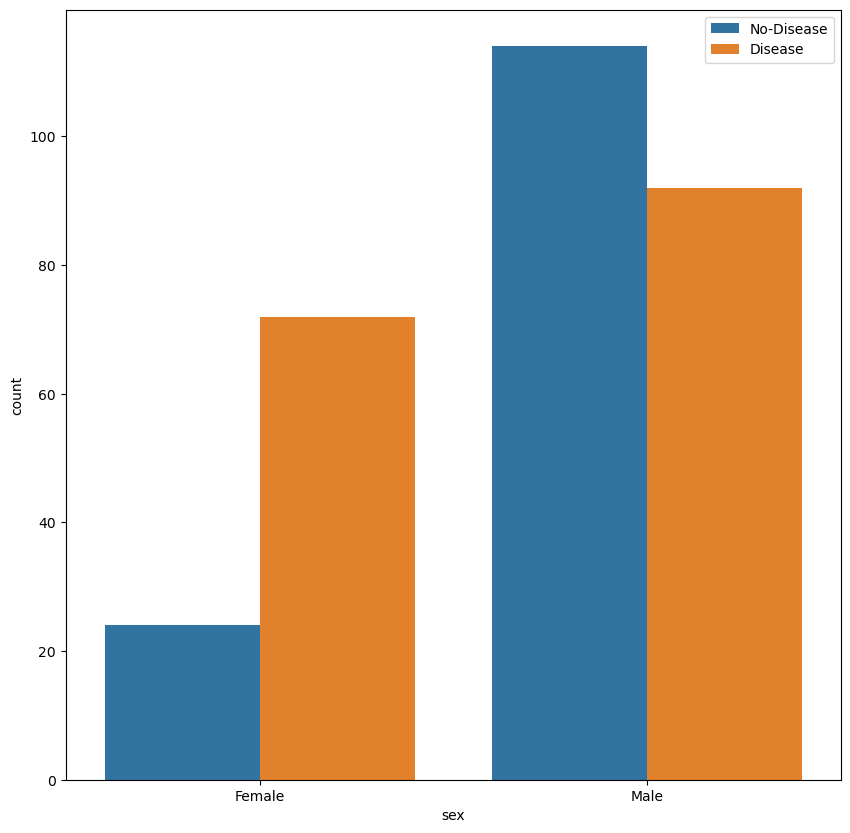

In [36]:
sns.countplot(data=heartdata, x=heartdata['sex'], hue=heartdata['target'])
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

### Distribution of Ages in Our Dataset

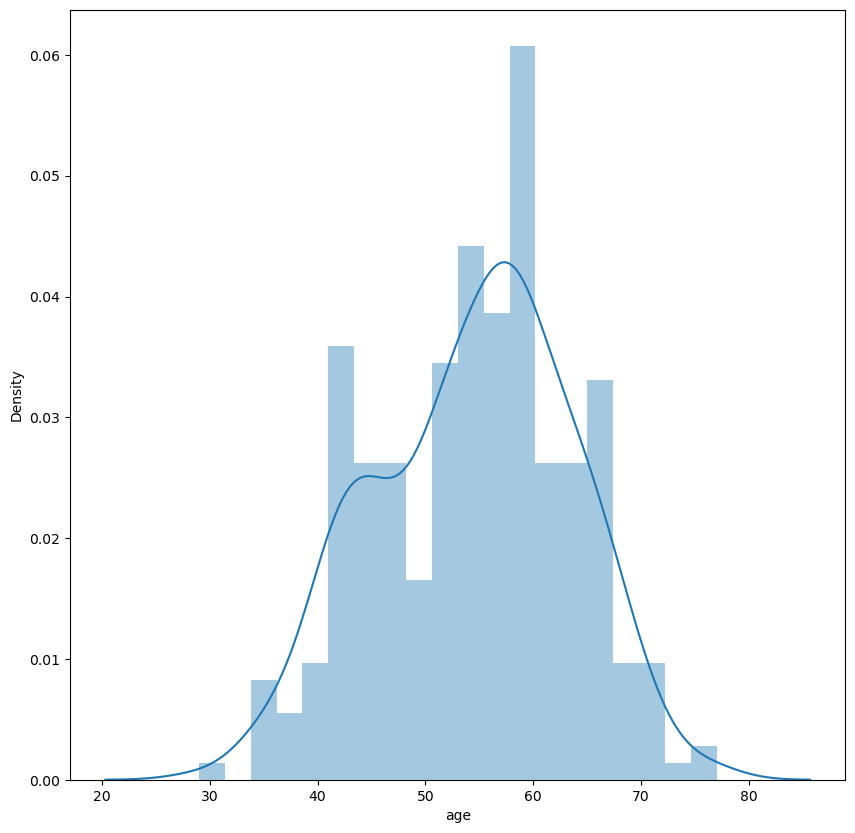

In [39]:
sns.distplot(heartdata['age'], bins=20)
plt.show()

### Chest Pain Distribution in Heart Disease vs. Non-Heart Disease

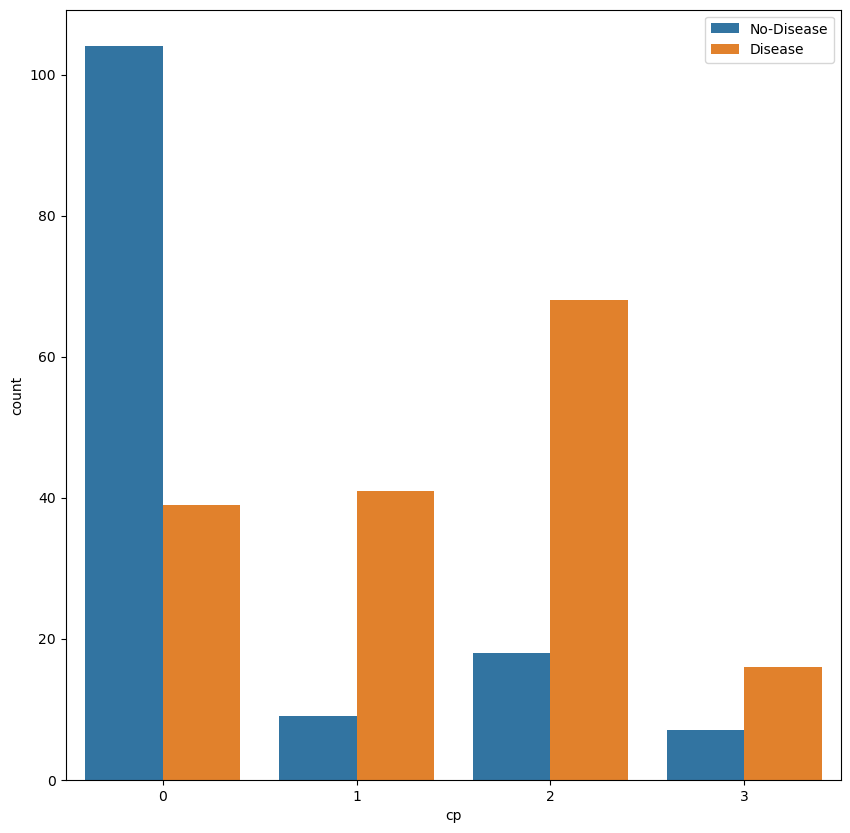

In [43]:
sns.countplot(data=heartdata, x= 'cp', hue='target')
plt.legend(labels=["No-Disease", "Disease"])
plt.show()

### Resting Blood Pressure Distribution Overview

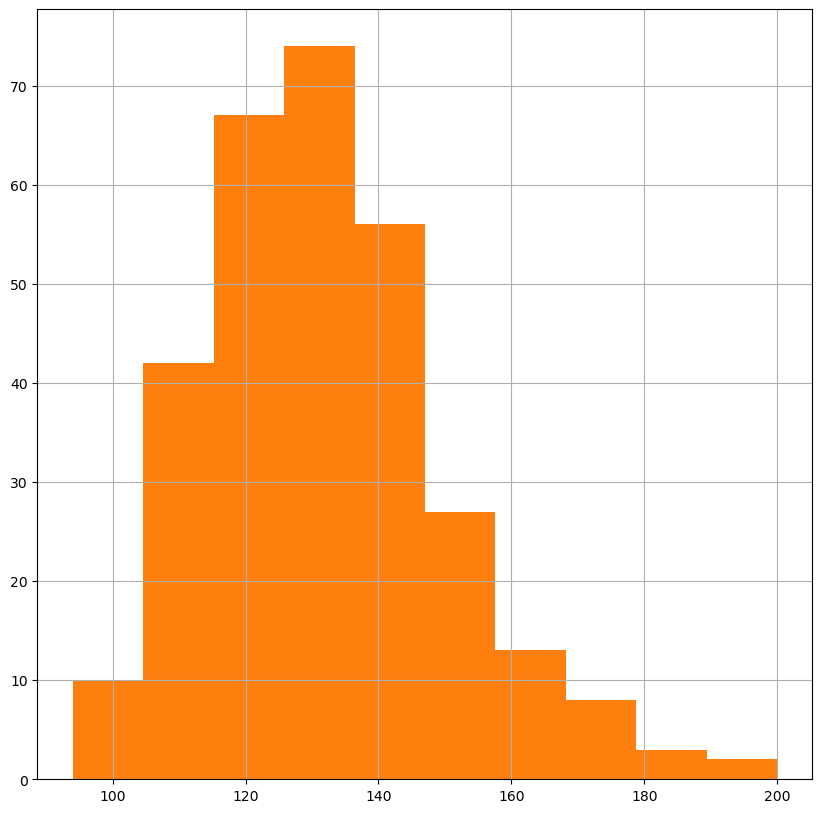

In [45]:
heartdata['trestbps'].hist()
plt.show()

### Serum Cholesterol (chol) Data Distribution

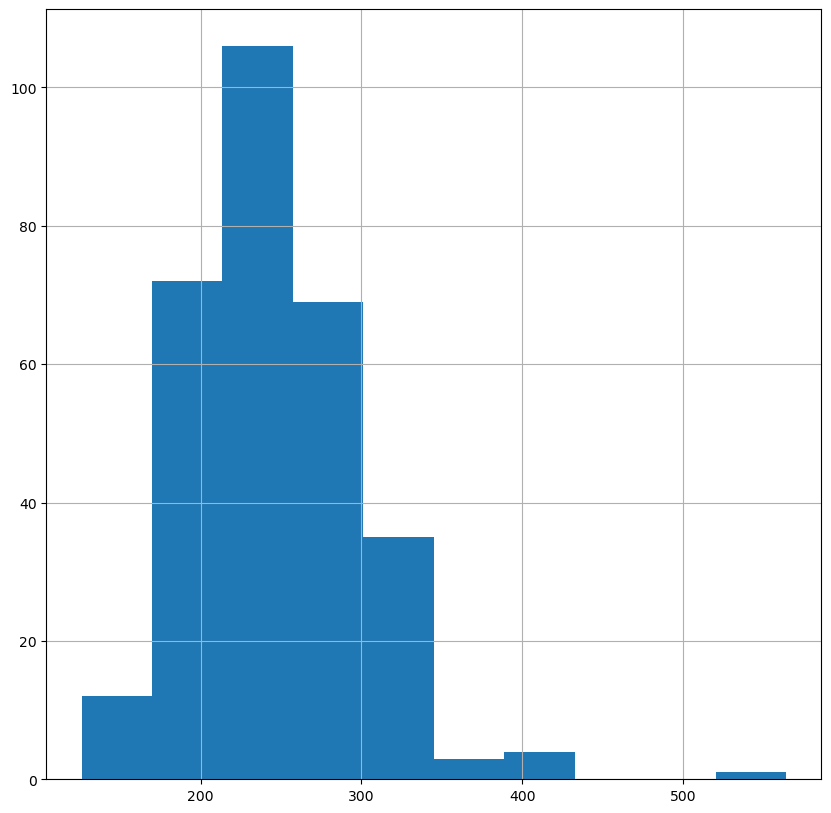

In [46]:
heartdata['chol'].hist()
plt.show()

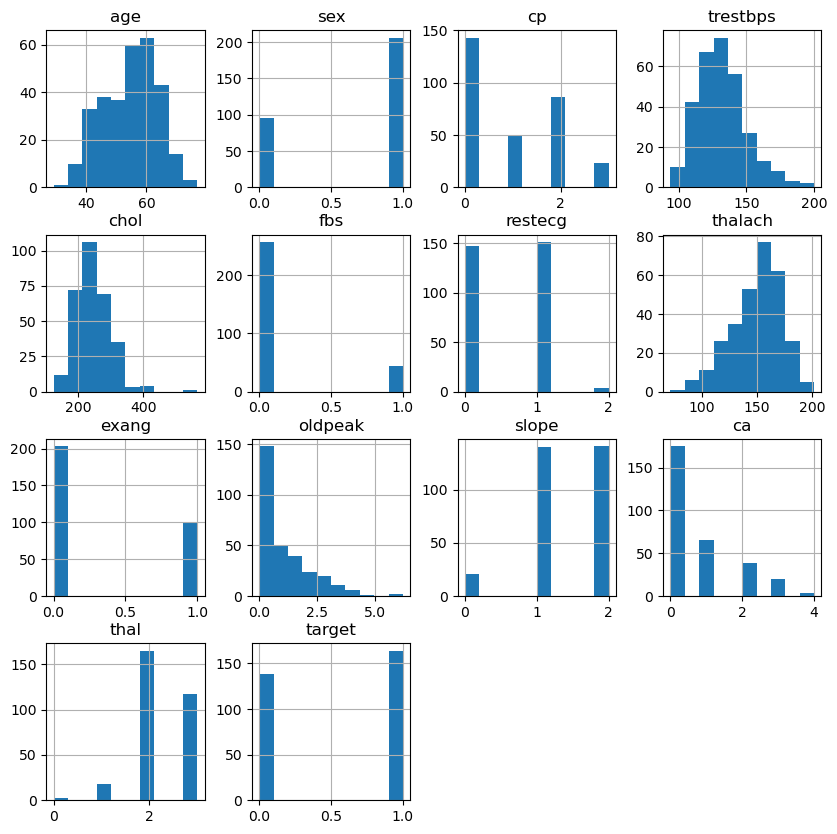

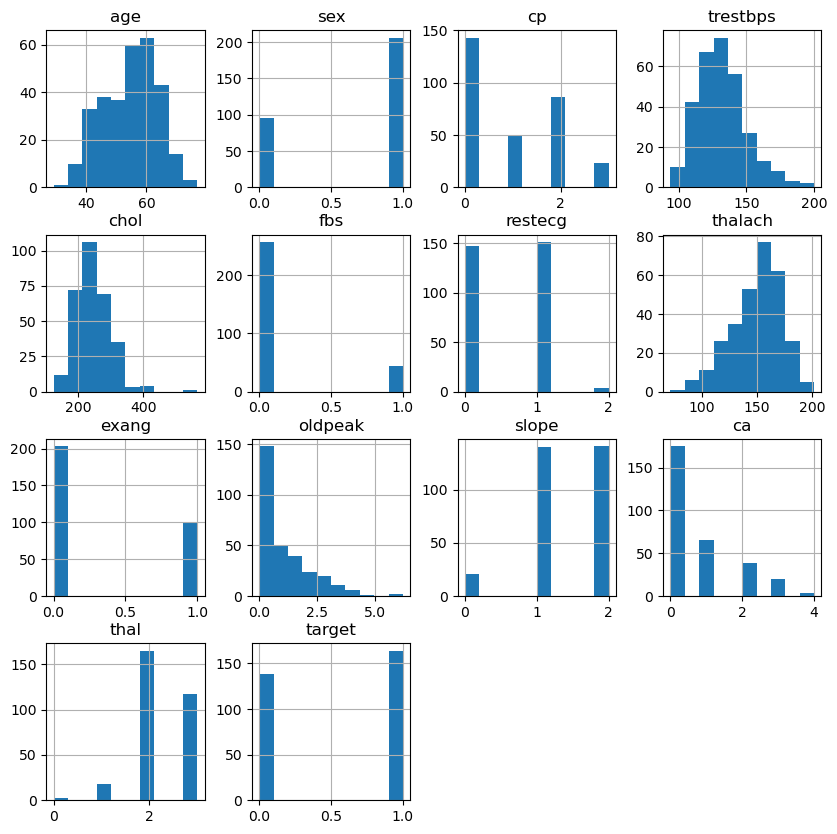

In [48]:
heartdata.hist()
plt.show()

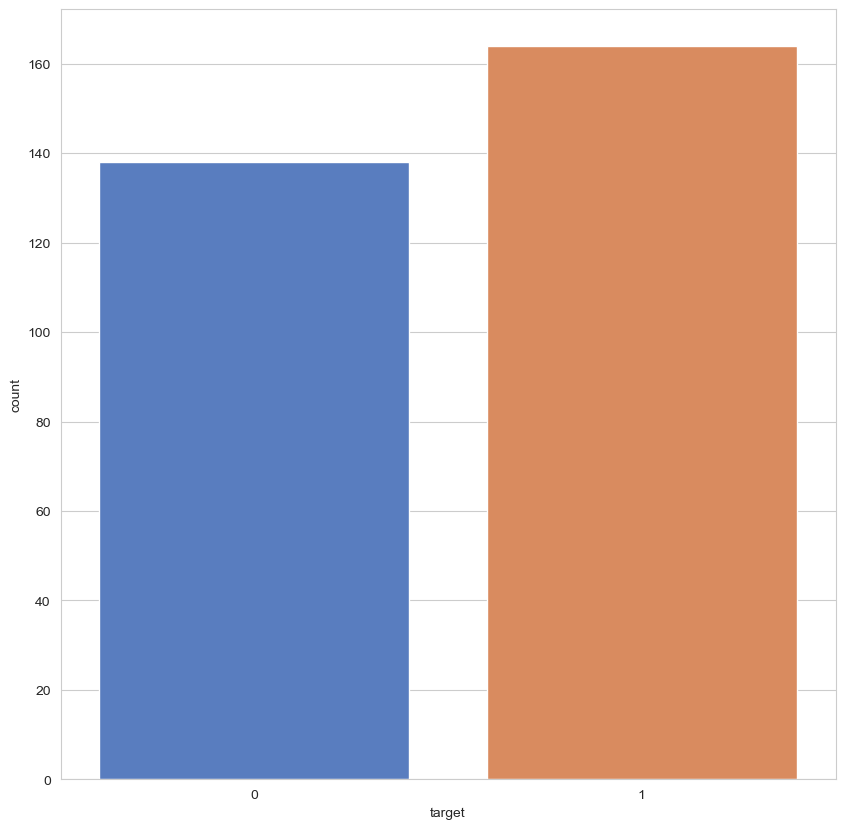

In [59]:
#sns.set_style('whitegrid')
sns.countplot(x='target',data=heartdata,palette = 'muted')
plt.show()

### Divide data into training testing classes

In [8]:
x = heartdata.drop(['target'],axis = 1)
y = heartdata['target']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0)
print('xtrain',x_train.shape[0],'xtest',x_test.shape[0],'ytrain',y_train.shape[0],'ytest',y_test.shape[0])

xtrain 211 xtest 91 ytrain 211 ytest 91


### Model Building

### KNN Algorithm

In [9]:
knn_scores = []
for k in range(2,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(x_train.values, y_train.values)
    knn_score=round(knn_classifier.score(x_test.values, y_test.values),2)
    knn_scores.append(knn_score)

knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train, y_train)
knn_score=knn_classifier.predict(x_test)
print(classification_report(y_test,knn_score))

              precision    recall  f1-score   support

           0       0.62      0.49      0.55        41
           1       0.64      0.76      0.70        50

    accuracy                           0.64        91
   macro avg       0.63      0.62      0.62        91
weighted avg       0.64      0.64      0.63        91



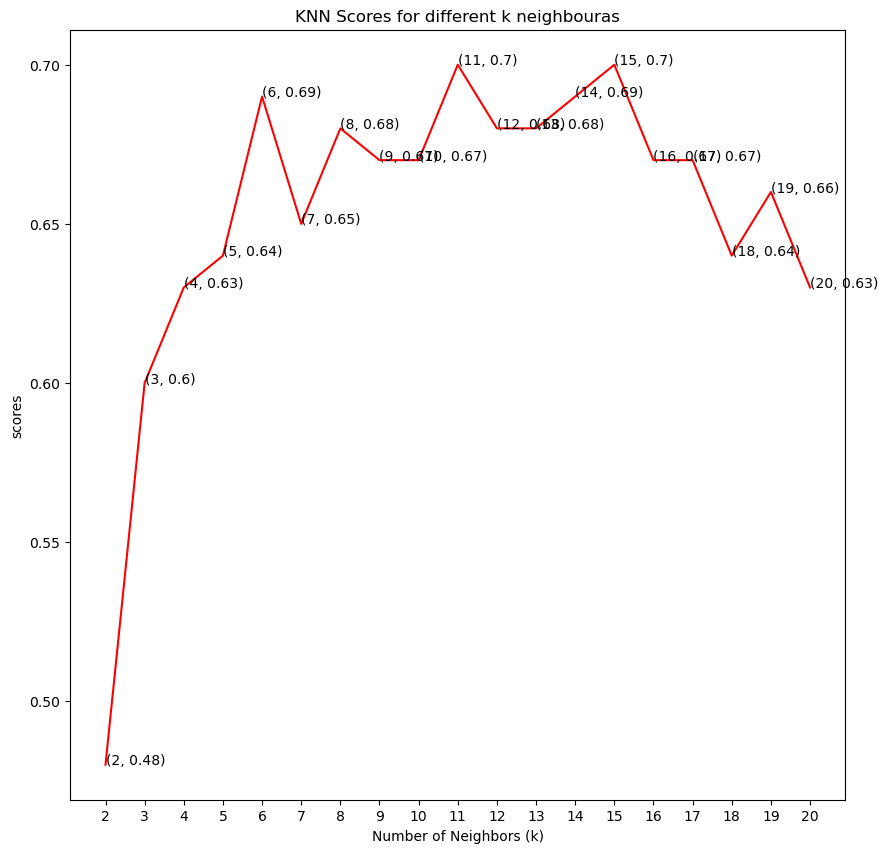

In [10]:
plt.plot([k for k in range(2,21)], knn_scores, color = 'red')
for i in range(2,21):
    plt.text(i, knn_scores[i-2],(i, knn_scores[i-2]))
plt.xticks([i for i in range(2,21)])
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('scores')
plt.title('KNN Scores for different k neighbouras')
plt.show()

### Support Vector Machine

In [11]:
from sklearn.metrics import accuracy_score
svc_scores = []
kernels = ['linear', 'poly','rbf','sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(x_train.values, y_train.values)
    svc_scores.append(round(svc_classifier.score(x_test.values, y_test.values),2))
    
svc_classifier = SVC(kernel = kernels[0])
svc_classifier.fit(x_train.values, y_train.values)
svc_prediction_result=svc_classifier.predict(x_test.values)
#print(svc_prediction_result)
print(accuracy_score(y_test.values,svc_prediction_result))

0.7912087912087912


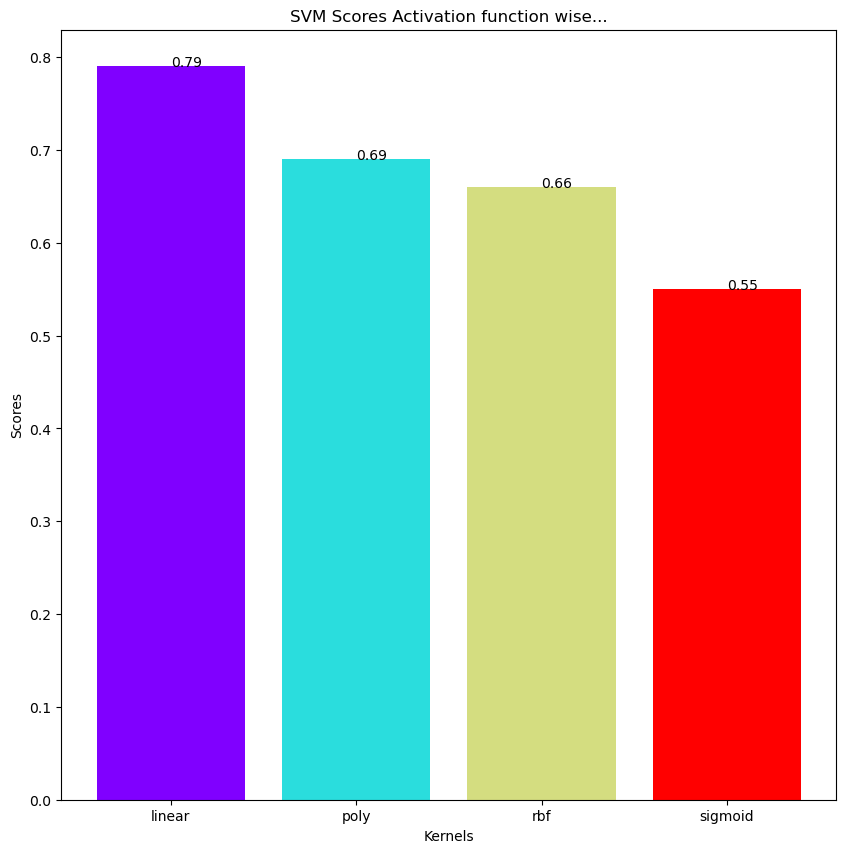

In [12]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('SVM Scores Activation function wise...')
plt.show()

### Decision Tree

In [13]:
dt_scores = []
for i in range(1, len(x.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(x_train.values, y_train.values)
    dt_scores.append(round(dt_classifier.score(x_test.values, y_test.values),2))
print("Done")

Done


In [14]:
print(dt_scores)

[0.66, 0.7, 0.74, 0.71, 0.71, 0.68, 0.7, 0.73, 0.7, 0.71, 0.74, 0.74, 0.74]


In [15]:
 dt_classifier = DecisionTreeClassifier(max_features = 13, random_state = 0)
 dt_classifier.fit(x_train.values, y_train.values)

DecisionTreeClassifier(max_features=13, random_state=0)

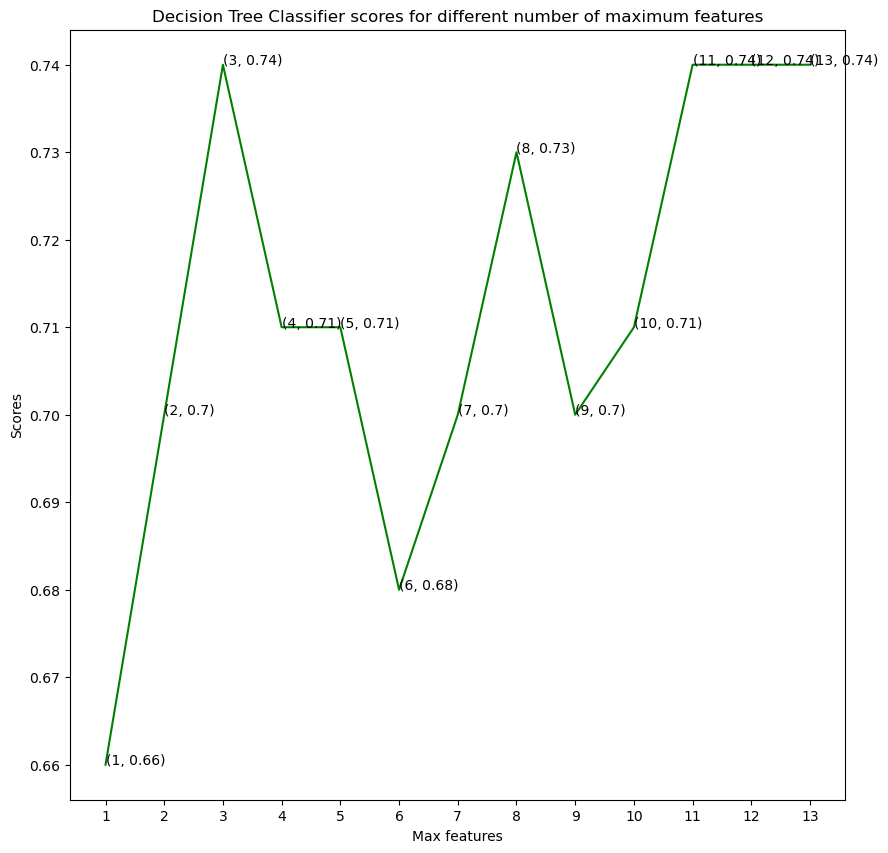

In [16]:
plt.plot([i for i in range(1, len(x.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(x.columns) + 1):
    plt.text(i, dt_scores[i-1],(i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(x.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
plt.show()

### Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rf_model = []
estimators = [10, 20, 100, 200,500]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train.values, y_train.values)
    rf_model.append(round(rf_classifier.score(x_test.values, y_test.values),2))

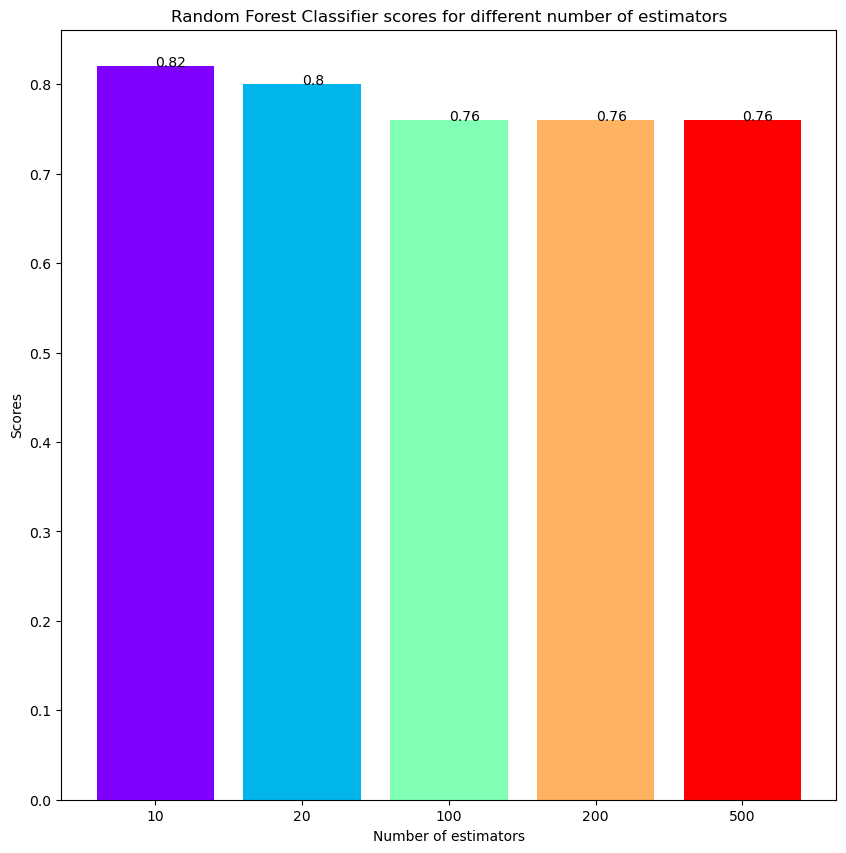

In [47]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_model, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_model[i], rf_model[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')
plt.show()

### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train.values, y_train.values)
logistic_model_prediction=logistic_model.predict(x_test.values)
print(accuracy_score(y_test.values,logistic_model_prediction))
print(classification_report(y_test.values,logistic_model_prediction))

0.7912087912087912
              precision    recall  f1-score   support

           0       0.84      0.66      0.74        41
           1       0.76      0.90      0.83        50

    accuracy                           0.79        91
   macro avg       0.80      0.78      0.78        91
weighted avg       0.80      0.79      0.79        91



## Conclusion 

### AS we can see that the Random Forest Model give the better accuracy to compare another models for Heart Disease Analysis. it is help to recognize the Heart Disease patient in our country, state, District and area.